In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/tsla_raw_data.csv")
df

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN
...,...,...,...,...,...,...,...,...,...
3467,2024-04-09,172.9100,179.2200,171.9200,176.8800,103232703,176.8800,2.25,96874603.60
3468,2024-04-10,173.0400,174.9300,170.0100,171.7600,84532406,171.7600,-2.89,96731639.90
3469,2024-04-11,172.5500,175.8800,168.5100,174.6000,94515992,174.6000,1.65,96131214.90
3470,2024-04-12,172.3400,173.8099,170.3644,171.0500,64722672,171.0500,-2.03,93051063.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472 entries, 0 to 3471
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3472 non-null   object 
 1   open            3472 non-null   float64
 2   high            3472 non-null   float64
 3   low             3472 non-null   float64
 4   close           3472 non-null   float64
 5   volume          3472 non-null   int64  
 6   adjusted_close  3472 non-null   float64
 7   change_percent  3471 non-null   float64
 8   avg_vol_20d     3453 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 244.3+ KB


In [ ]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df.drop('date',axis=1).corr()


,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
open,1.000000,0.999355,0.999330,0.998691,0.061574,0.614710,0.026916,0.408817
high,0.999355,1.000000,0.999058,0.999259,0.063944,0.613809,0.040399,0.411261
low,0.999330,0.999058,1.000000,0.999434,0.059096,0.615567,0.040585,0.406365
close,0.998691,0.999259,0.999434,1.000000,0.061764,0.614354,0.055338,0.409167
volume,0.061574,0.063944,0.059096,0.061764,1.000000,0.602711,-0.002744,0.304022
adjusted_close,0.614710,0.613809,0.615567,0.614354,0.602711,1.000000,0.001422,0.144743
change_percent,0.026916,0.040399,0.040585,0.055338,-0.002744,0.001422,1.000000,0.040143
avg_vol_20d,0.408817,0.411261,0.406365,0.409167,0.304022,0.144743,0.040143,1.000000


In [ ]:
df.describe()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
count,3472,3472.000000,3472.000000,3472.000000,3472.000000,3.472000e+03,3472.000000,3471.000000,3.453000e+03
mean,2017-05-20 17:09:48.940092160,305.690278,312.419580,298.713120,305.740220,2.357981e+07,72.985387,0.196765,9.696034e+07
min,2010-06-29 00:00:00,16.140000,16.629900,14.979900,15.800100,1.186140e+05,1.053300,-21.060000,4.317139e+06
25%,2013-12-08 06:00:00,154.696200,160.307475,150.677475,153.360000,3.265562e+06,11.114825,-1.600000,5.625444e+07
50%,2017-05-20 12:00:00,233.439900,237.435000,229.099950,232.995050,6.945234e+06,17.182350,0.120000,8.969658e+07
75%,2020-10-29 06:00:00,337.035075,343.424775,331.327575,335.967450,2.152074e+07,140.345025,1.920000,1.270215e+08
max,2024-04-15 00:00:00,2295.120000,2318.490000,2186.520000,2238.750000,3.065906e+08,409.970000,24.400000,3.886315e+08
std,NaN,289.068278,297.040395,280.931334,289.265494,4.035666e+07,101.941795,3.574390,6.331152e+07


In [ ]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
adjusted_close,0
change_percent,1
avg_vol_20d,19


In [ ]:
df['OpenCloseDiff']=df['close']-df['open']
df['HighLowDiff']=df['high']-df['low']
for i in range(1, len(df)):
  if (df.loc[i,'low']>df.loc[i-1,'low']):
    df.loc[i,'Output']=1

  else:
    df.loc[i,'Output']=0
df

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d,OpenCloseDiff,HighLowDiff,Output
0,2010-06-29,18.9999,24.9999,17.5401,23.8899,18783278,1.5927,NaN,NaN,4.8900,7.4598,NaN
1,2010-06-30,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,NaN,-1.9602,7.1190,1.0
2,2010-07-01,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,NaN,-3.0399,5.6499,0.0
3,2010-07-02,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,NaN,-3.8001,4.3899,0.0
4,2010-07-06,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,NaN,-3.8901,4.1700,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3467,2024-04-09,172.9100,179.2200,171.9200,176.8800,103232703,176.8800,2.25,96874603.60,3.9700,7.3000,1.0
3468,2024-04-10,173.0400,174.9300,170.0100,171.7600,84532406,171.7600,-2.89,96731639.90,-1.2800,4.9200,0.0
3469,2024-04-11,172.5500,175.8800,168.5100,174.6000,94515992,174.6000,1.65,96131214.90,2.0500,7.3700,0.0
3470,2024-04-12,172.3400,173.8099,170.3644,171.0500,64722672,171.0500,-2.03,93051063.75,-1.2900,3.4455,1.0


In [ ]:
df.dropna(subset=['Output'], inplace=True)
x=df.iloc[:,1:11]
y=df.iloc[:,11]
# Impute missing values in features using the mean
x = x.fillna(x.mean())
y=y.fillna(y.mean())

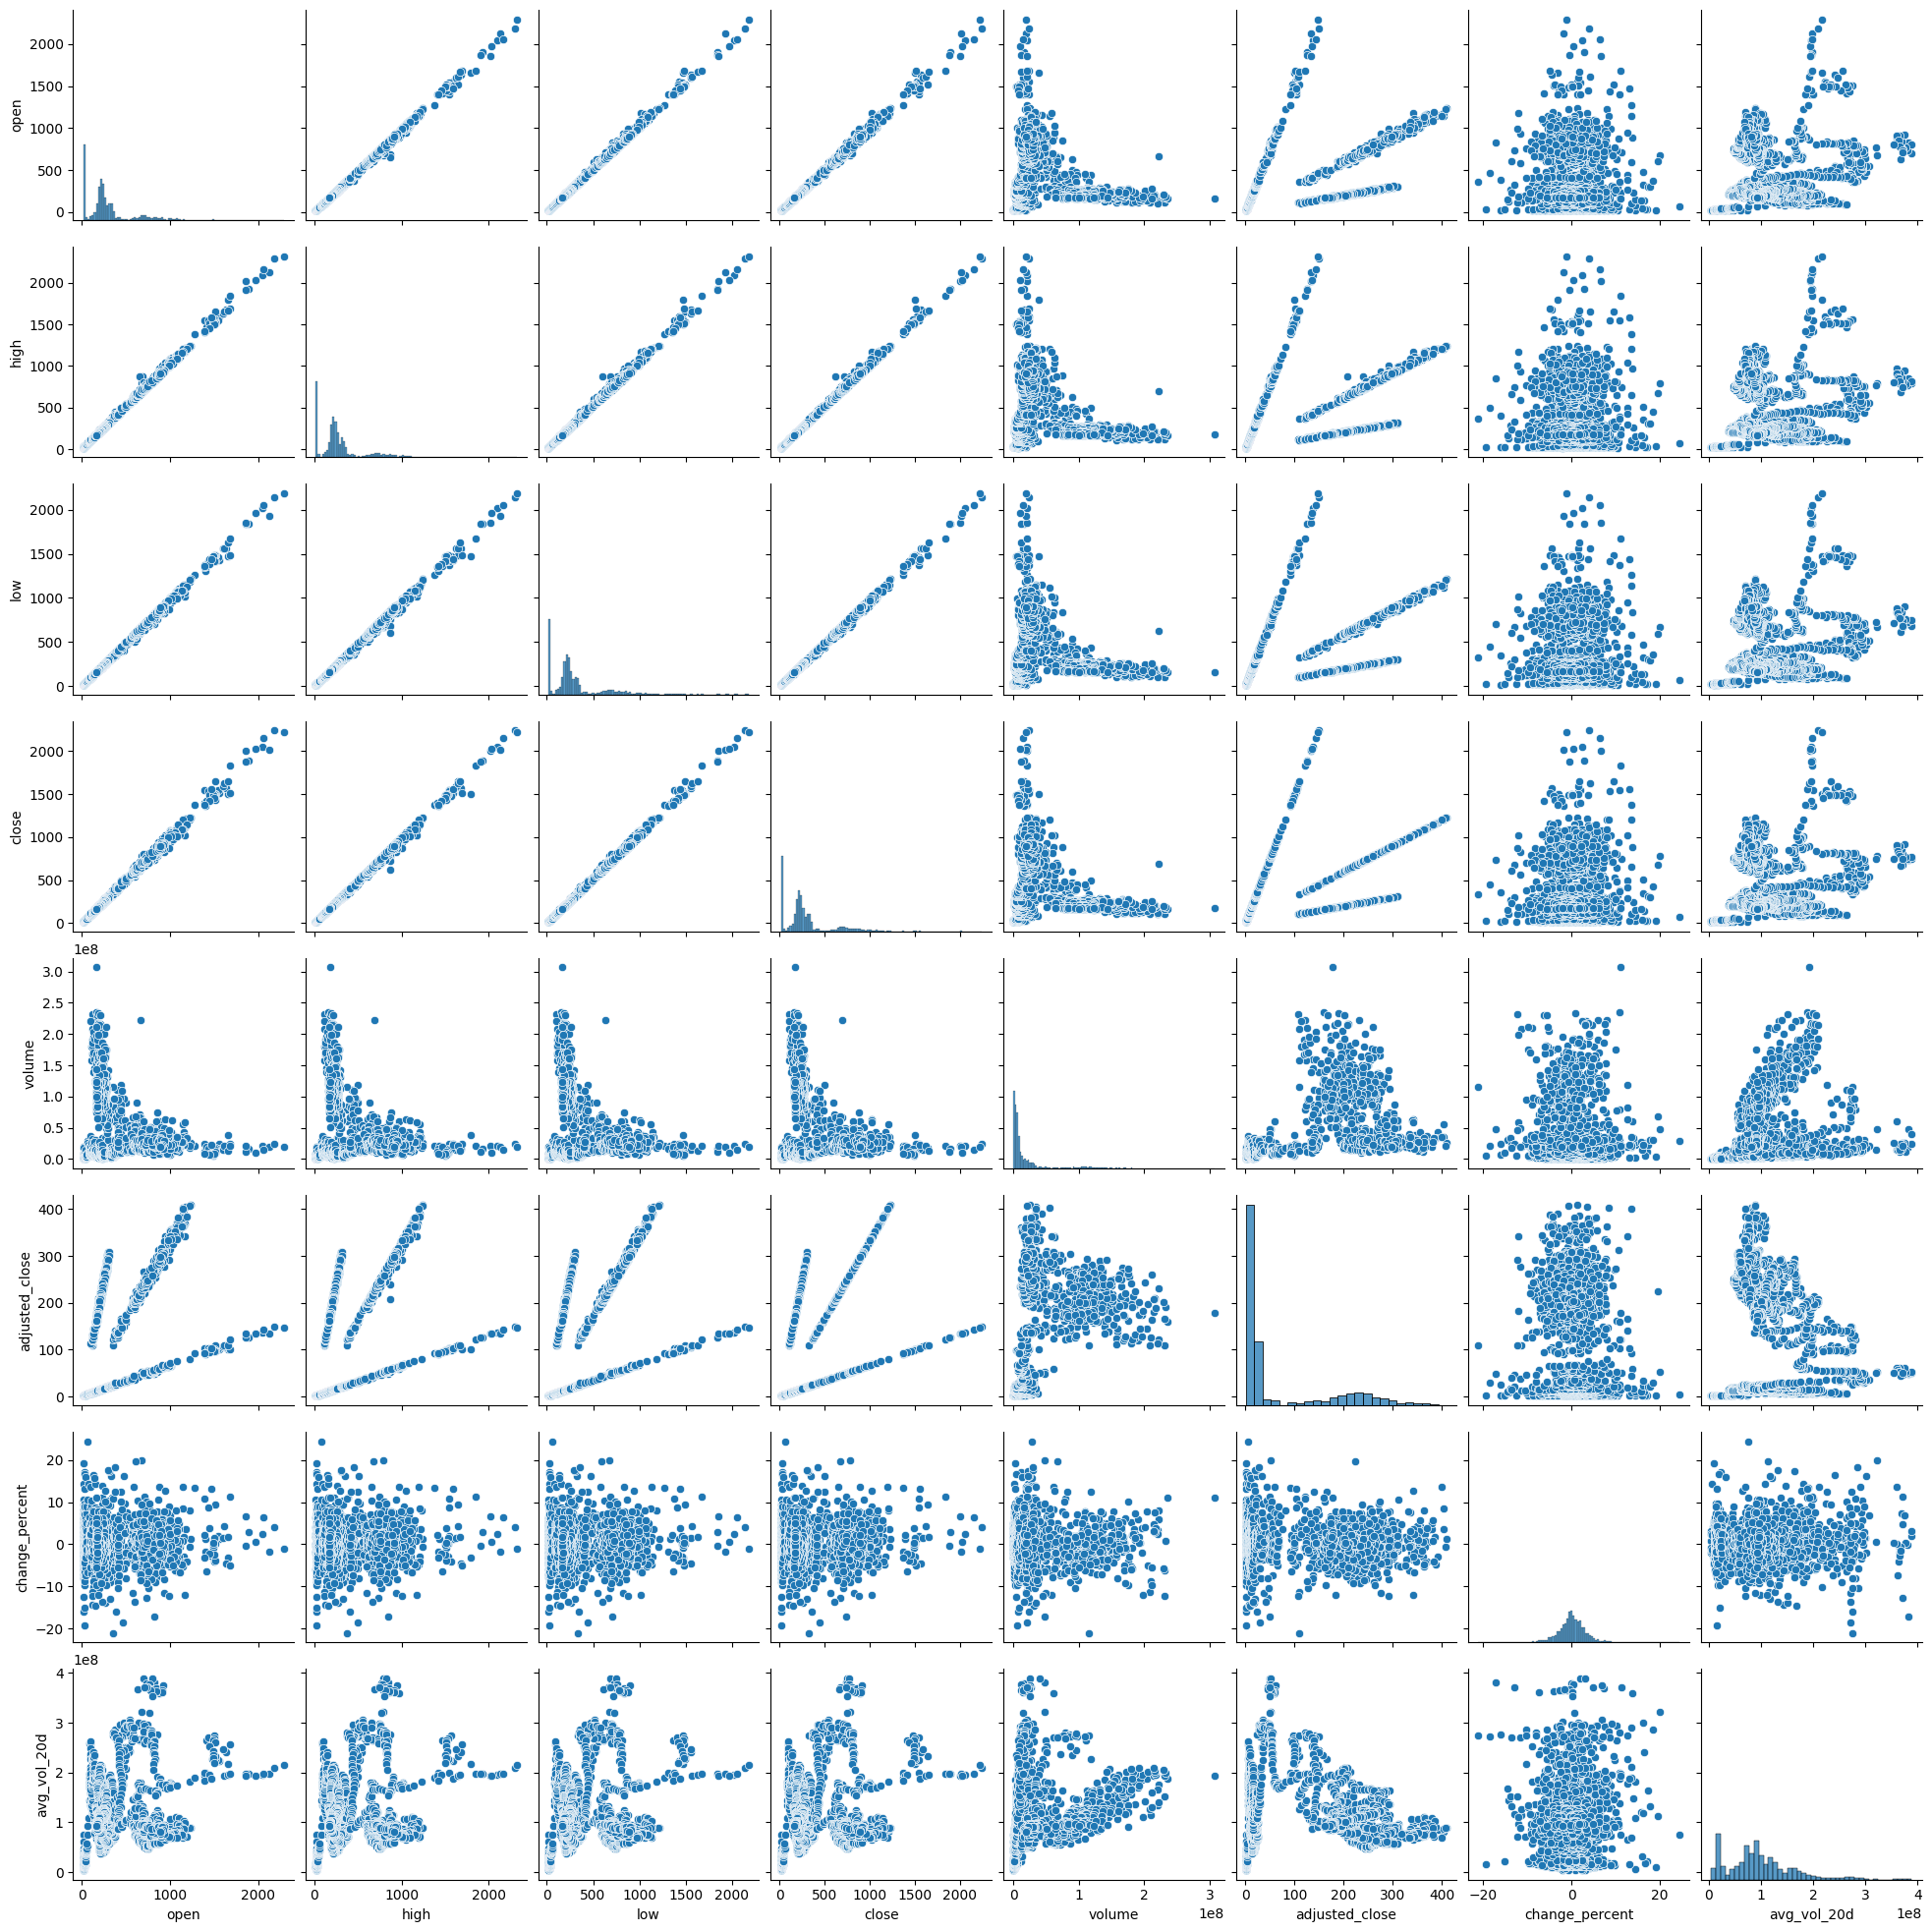

In [ ]:
sns.pairplot(df)

In [ ]:
x

,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d,OpenCloseDiff,HighLowDiff
1,25.7901,30.4191,23.3001,23.8299,17194392,1.5887,-0.25,9.696034e+07,-1.9602,7.1190
2,24.9999,25.9200,20.2701,21.9600,8229862,1.4640,-7.85,9.696034e+07,-3.0399,5.6499
3,23.0001,23.1000,18.7101,19.2000,5141806,1.2800,-12.57,9.696034e+07,-3.8001,4.3899
4,20.0001,20.0001,15.8301,16.1100,6879295,1.0740,-16.09,9.696034e+07,-3.8901,4.1700
5,16.4001,16.6299,14.9799,15.8001,6924913,1.0533,-1.93,9.696034e+07,-0.6000,1.6500
...,...,...,...,...,...,...,...,...,...,...
3467,172.9100,179.2200,171.9200,176.8800,103232703,176.8800,2.25,9.687460e+07,3.9700,7.3000
3468,173.0400,174.9300,170.0100,171.7600,84532406,171.7600,-2.89,9.673164e+07,-1.2800,4.9200
3469,172.5500,175.8800,168.5100,174.6000,94515992,174.6000,1.65,9.613121e+07,2.0500,7.3700
3470,172.3400,173.8099,170.3644,171.0500,64722672,171.0500,-2.03,9.305106e+07,-1.2900,3.4455


In [ ]:
y


,Output
1,1.0
2,0.0
3,1.0
4,0.0
5,0.0
...,...
248,0.0
249,0.0
250,1.0
251,1.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [ ]:
  n

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2325, 10), (1146, 10), (2325,), (1146,))

In [ ]:
# standardisation
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 2.31166322,  2.2050117 ,  2.42361845, ..., -0.64800277,
        -0.13903254, -0.6563891 ],
       [-0.47464337, -0.61009187, -0.50289689, ..., -1.15460455,
        -0.41006117, -0.81343691],
       [-0.81277531, -0.85157717, -1.16063055, ...,  0.63398029,
        -1.77619502,  1.58648477],
       ...,
       [-0.23919178, -0.15455278, -0.11554735, ...,  0.76042558,
         0.95488506, -0.27638625],
       [ 0.98540057,  0.91017207,  1.07289029, ..., -0.99692851,
         0.26097122, -0.70107021],
       [-1.48384405, -1.48961609, -1.43586009, ..., -0.33394701,
         0.4722669 , -0.75194578]])

In [ ]:
x_test

array([[-0.96552538, -0.96127604, -0.97216408, ..., -1.0938252 ,
        -0.08539894, -0.60381639],
       [-0.15276828, -0.1409836 , -0.13611   , ...,  0.52859382,
         0.49592086, -0.17588407],
       [ 0.0425985 ,  0.02297522,  0.04421238, ...,  0.61454376,
        -0.24177396, -0.26867635],
       ...,
       [-0.12768601, -0.11167354, -0.10962816, ..., -0.55929239,
         0.6957011 , -0.11482257],
       [-0.7131018 , -0.68557997, -0.71281814, ...,  1.7415646 ,
         0.57435894, -0.16783185],
       [ 1.45745821,  1.59804341,  1.51341039, ...,  2.56892001,
         4.0727014 ,  2.3903039 ]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict=classifier.predict(x_test)
y_predict

array([0., 1., 0., ..., 1., 1., 1.])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
cm=confusion_matrix(y_test,y_predict)
cm

array([[355, 157],
       [ 99, 535]])

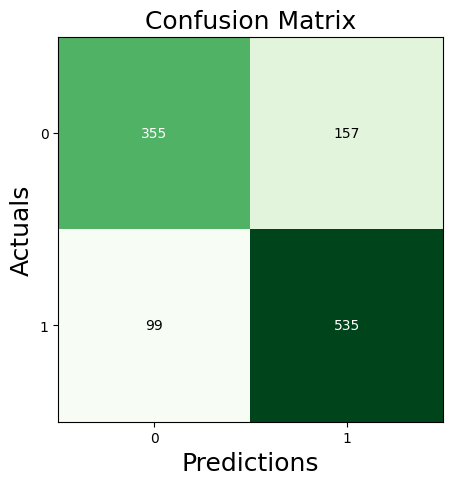

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm,figsize=(5, 5),cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
accuracy=accuracy_score(y_test,y_predict)
accuracy

0.7766143106457243

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       512
         1.0       0.77      0.84      0.81       634

    accuracy                           0.78      1146
   macro avg       0.78      0.77      0.77      1146
weighted avg       0.78      0.78      0.77      1146

